📊 EDA for Category: Video_Games


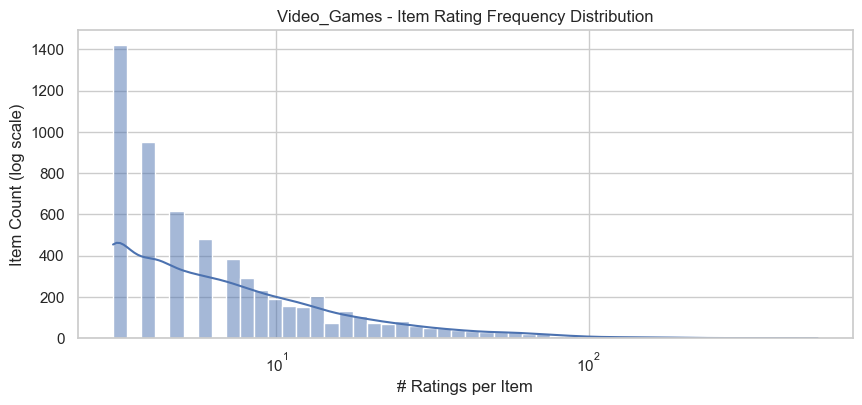

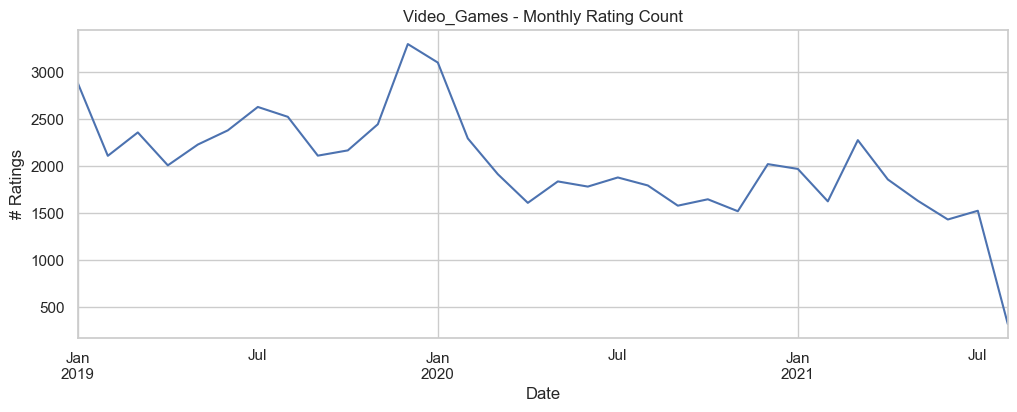

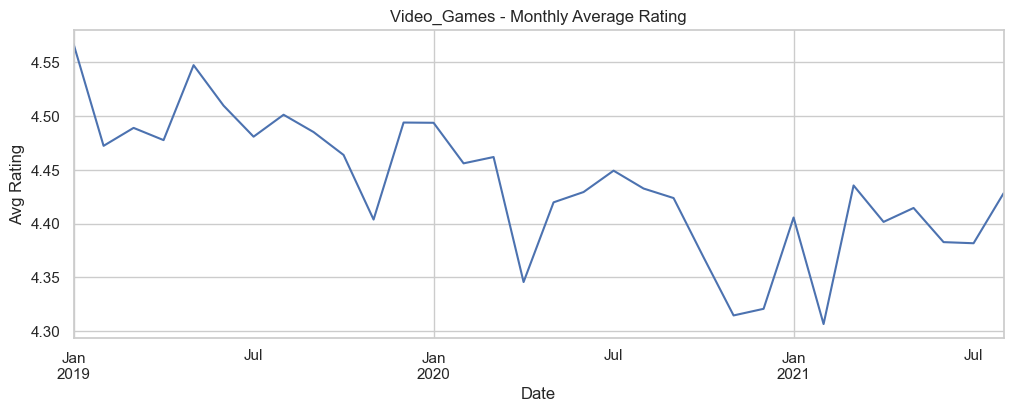

Matrix Sparsity: 0.9988


📊 EDA for Category: Home_and_Kitchen


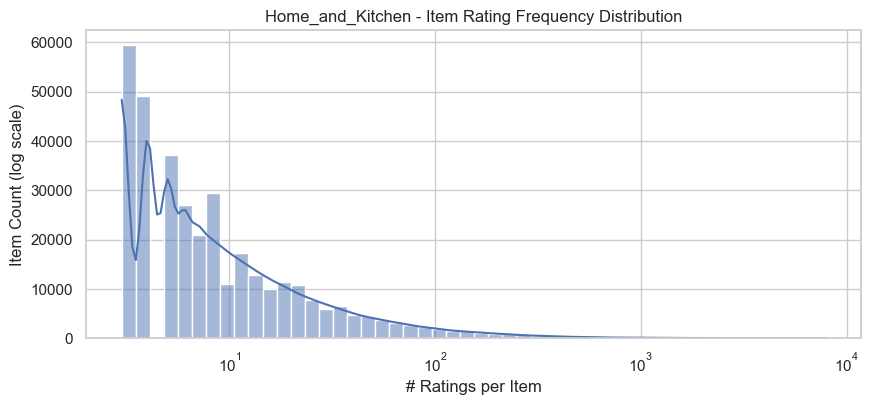

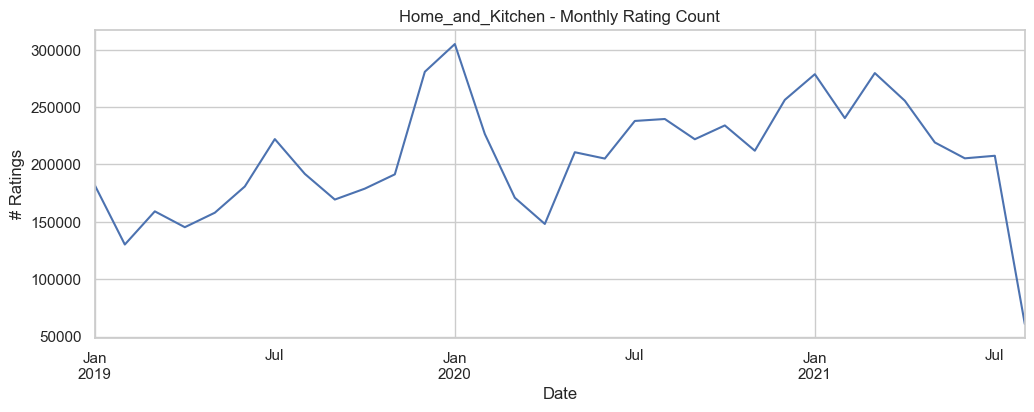

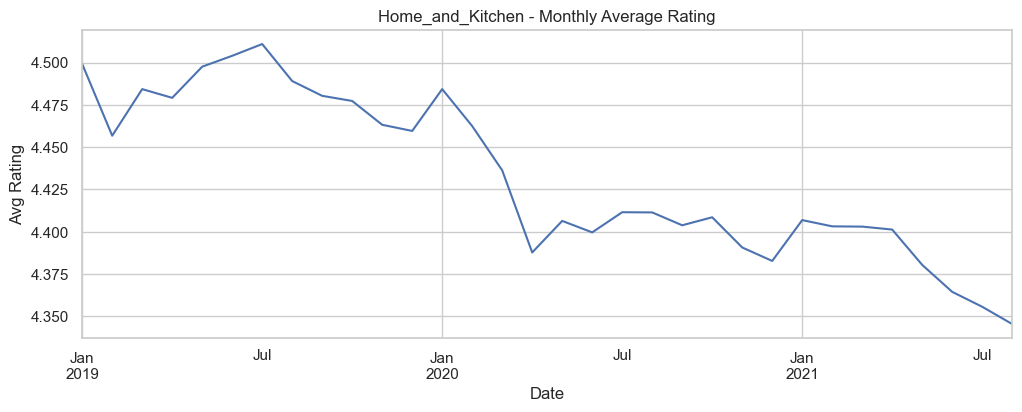

Matrix Sparsity: 1.0000


📊 EDA for Category: Health_and_Household


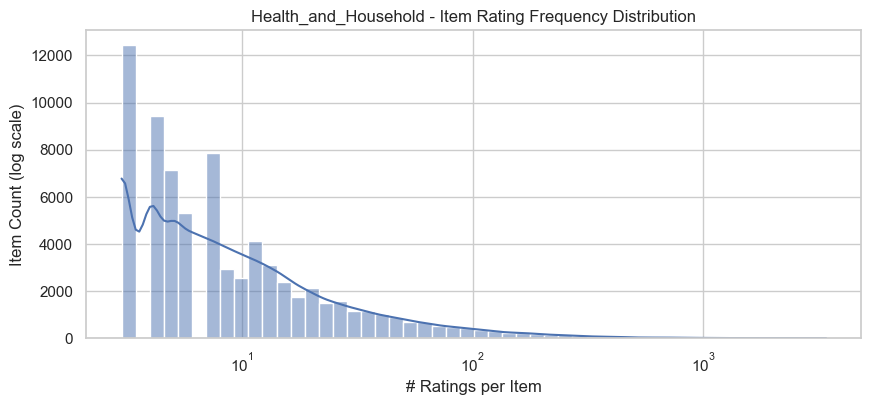

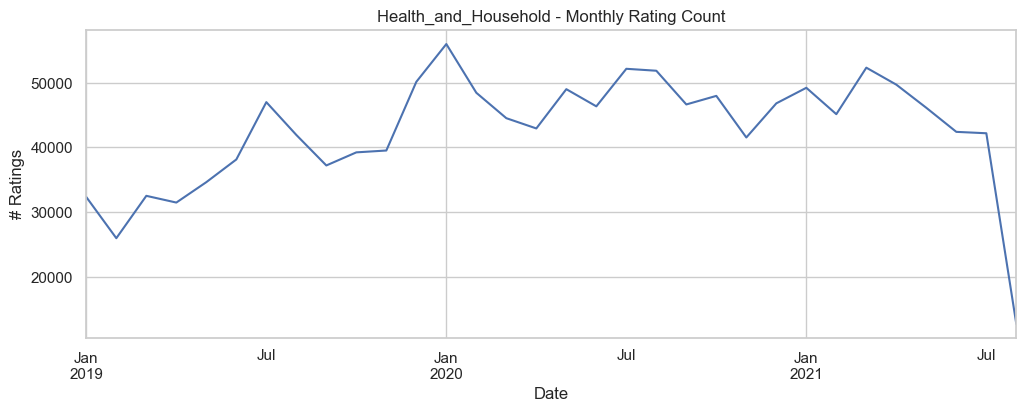

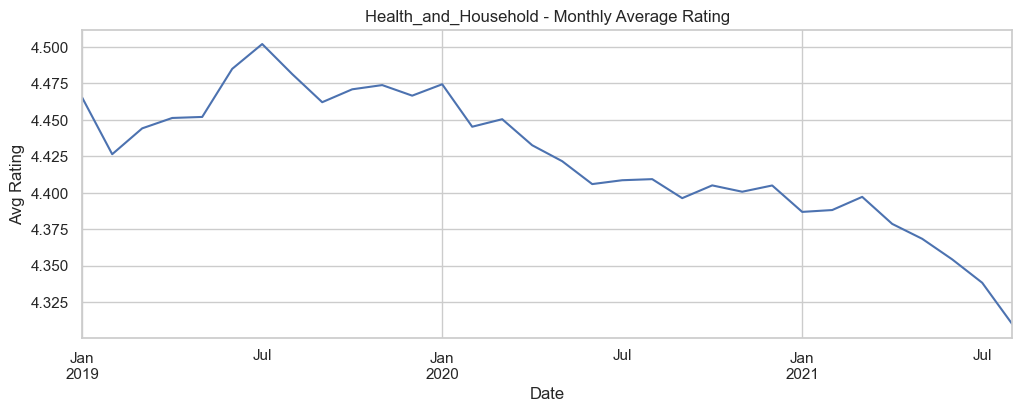

Matrix Sparsity: 0.9999


📊 EDA for Category: Pet_Supplies


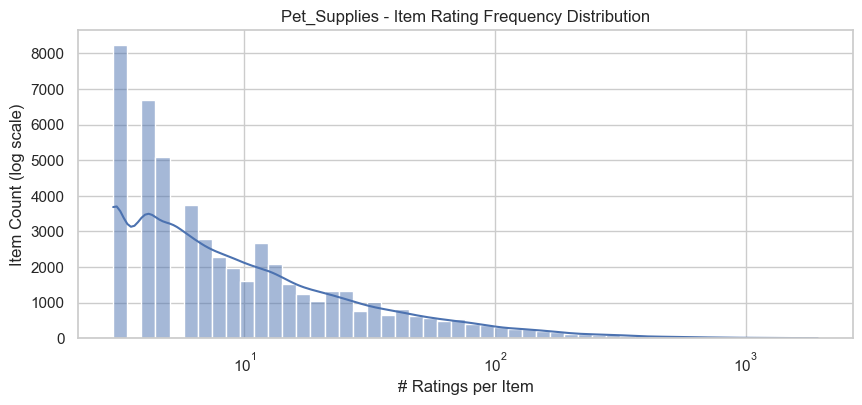

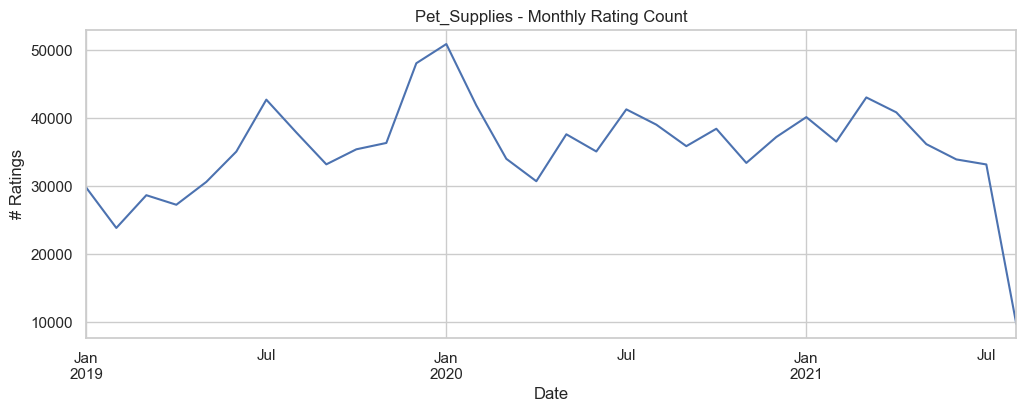

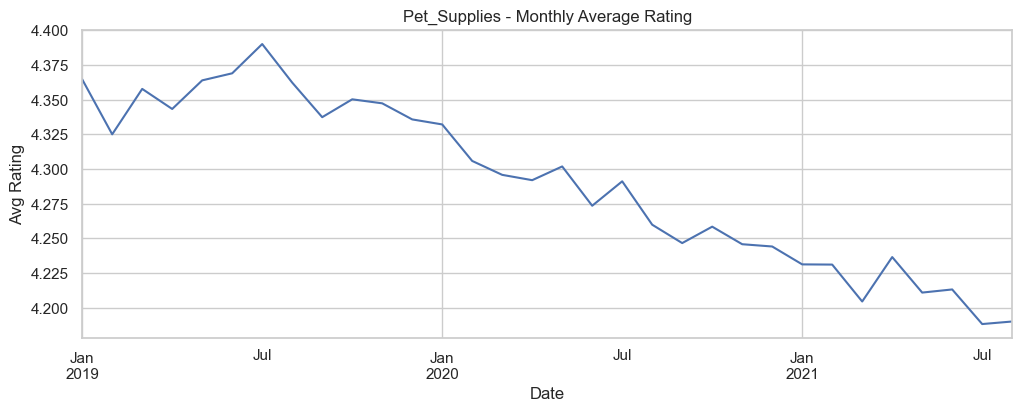

Matrix Sparsity: 0.9998


📊 EDA for Category: Tools_and_Home_Improvement


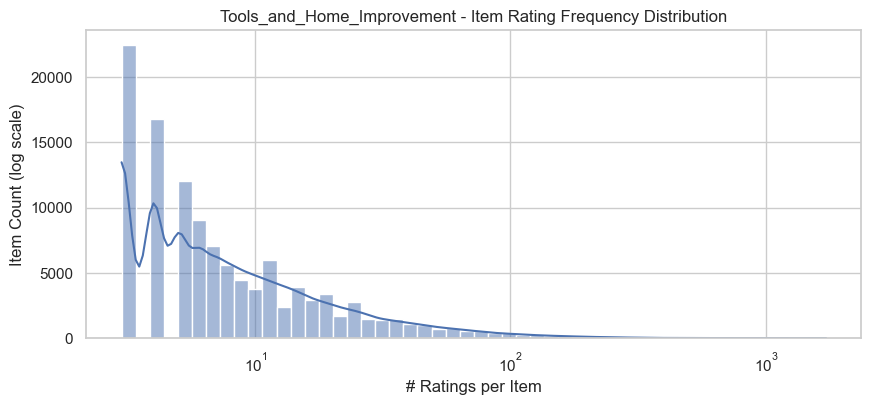

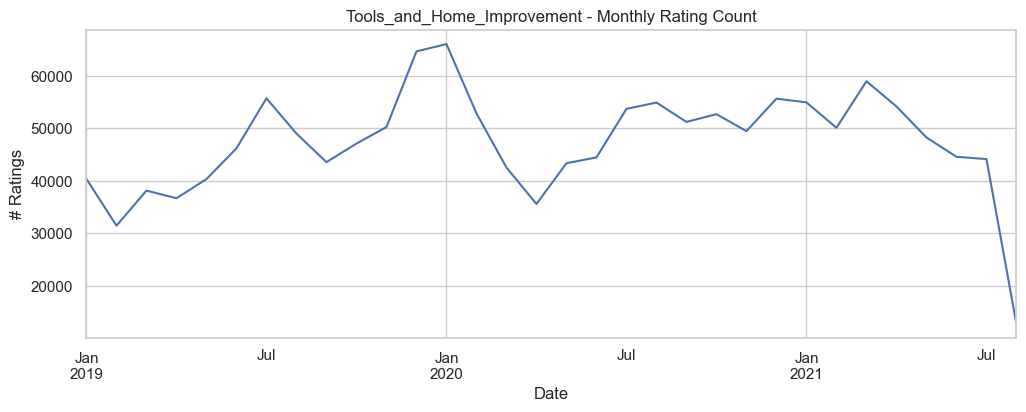

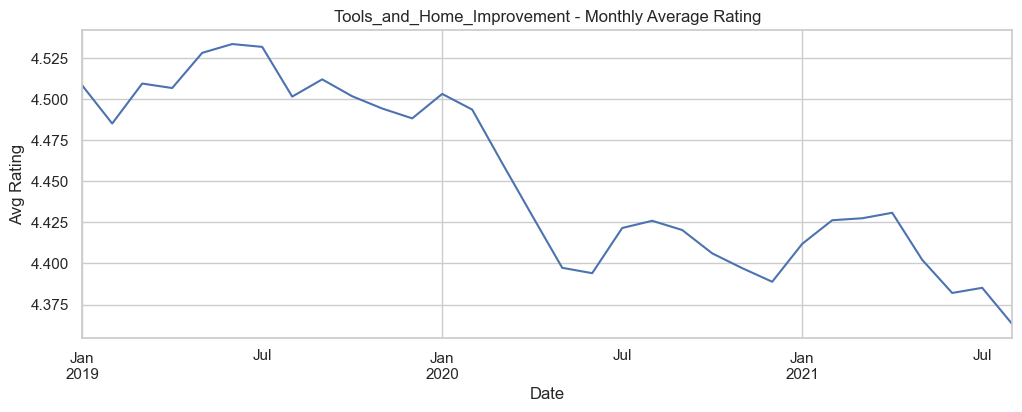

Matrix Sparsity: 0.9999


📊 EDA for Category: Grocery_and_Gourmet_Food


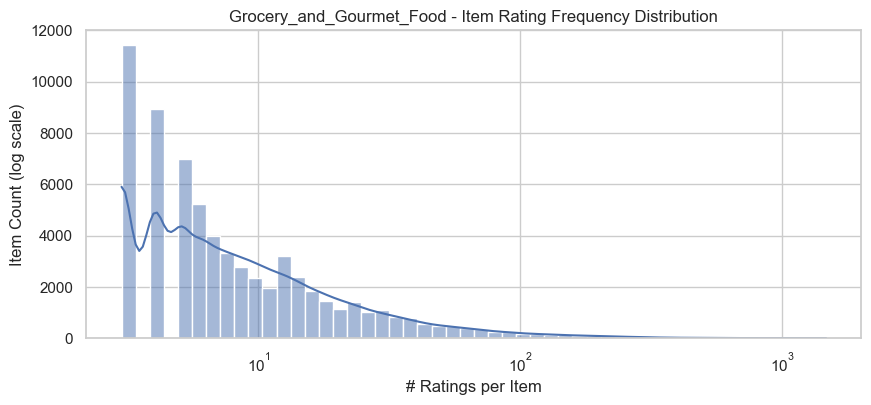

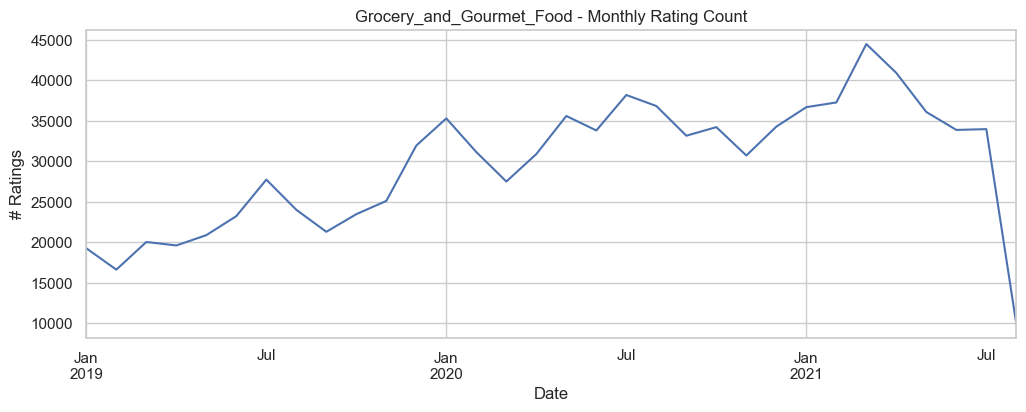

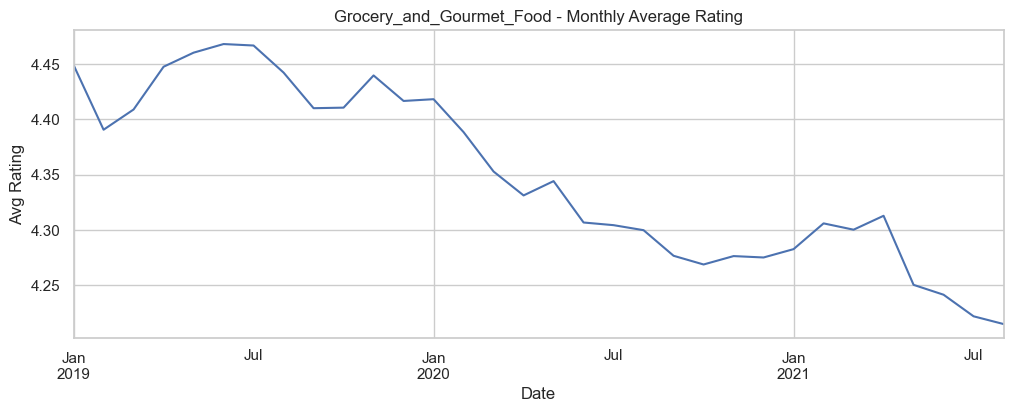

Matrix Sparsity: 0.9999




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict

# Adjust default style
sns.set(style="whitegrid")

# Function to perform EDA on multiple category-specific dataframes
def run_category_wise_eda(data_dir):
    summary_stats = {}

    for filename in os.listdir(data_dir):
        if filename.endswith(".csv"):
            category = filename.replace("_train.csv", "")
            df = pd.read_csv(os.path.join(data_dir, filename))

            print(f"📊 EDA for Category: {category}")
            print("=" * 50)

            # 1. Convert timestamp
            df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

            # 2. Item-Level: Item frequency distribution
            item_counts = df['parent_asin'].value_counts()
            plt.figure(figsize=(10, 4))
            sns.histplot(item_counts, bins=50, kde=True, log_scale=(True, False))
            plt.title(f"{category} - Item Rating Frequency Distribution")
            plt.xlabel("# Ratings per Item")
            plt.ylabel("Item Count (log scale)")
            plt.show()

            # Check how many items have >=10, >=20 ratings
            stats = {
                'num_items': df['parent_asin'].nunique(),
                'num_items_10+': (item_counts >= 10).sum(),
                'num_items_20+': (item_counts >= 20).sum(),
                'num_users': df['user_id'].nunique(),
                'num_ratings': len(df)
            }
            summary_stats[category] = stats

            # 3. Temporal Trends
            df['date'] = df['timestamp'].dt.to_period("M").dt.to_timestamp()
            monthly_counts = df.groupby('date').size()
            monthly_avg_rating = df.groupby('date')['rating'].mean()

            plt.figure(figsize=(12, 4))
            monthly_counts.plot()
            plt.title(f"{category} - Monthly Rating Count")
            plt.ylabel("# Ratings")
            plt.xlabel("Date")
            plt.show()

            plt.figure(figsize=(12, 4))
            monthly_avg_rating.plot()
            plt.title(f"{category} - Monthly Average Rating")
            plt.ylabel("Avg Rating")
            plt.xlabel("Date")
            plt.show()

            # 4. Matrix Sparsity
            sparsity = 1.0 - (len(df) / (stats['num_users'] * stats['num_items']))
            print(f"Matrix Sparsity: {sparsity:.4f}")
            print("\n")

    return summary_stats


# cats = ["Video_Games", "Pet_Supplies", "Home_and_Kitchen", "Health_and_Household", "Grocery_and_Gourmet_Food", "Tools_and_Home_Improvement"]

train_folder = f"data/processed/train/"
summary_stats = run_category_wise_eda(train_folder)

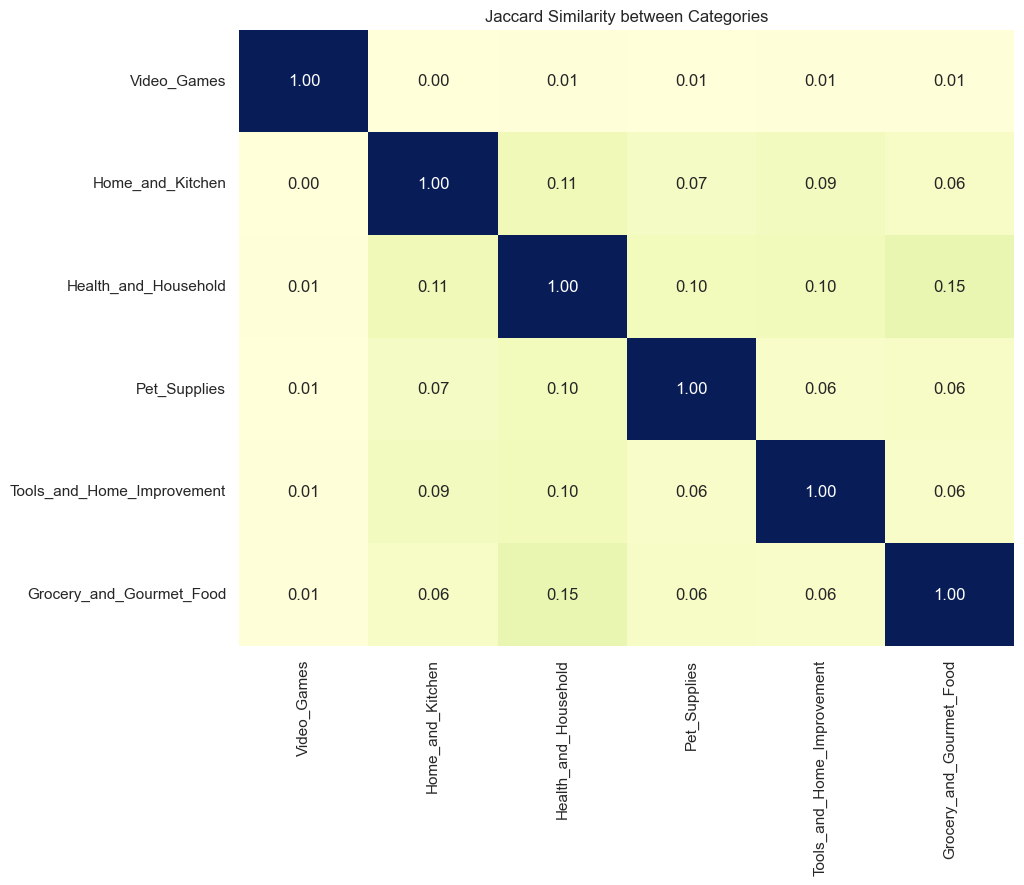

In [3]:
# cross cateogory user overlap calculate Jaccard similarity
def calculate_jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

def get_user_overlap(data_dir):
    user_item_map = defaultdict(set)

    for filename in os.listdir(data_dir):
        if filename.endswith(".csv"):
            category = filename.replace("_train.csv", "")
            df = pd.read_csv(os.path.join(data_dir, filename))
            user_item_map[category] = set(df['user_id'].unique())
    
    categories = list(user_item_map.keys())
    jaccard_matrix = pd.DataFrame(index=categories, columns=categories)
    for i in range(len(categories)):
        for j in range(len(categories)):
            if i != j:
                jaccard_matrix.iloc[i, j] = calculate_jaccard_similarity(user_item_map[categories[i]], user_item_map[categories[j]])
            else:
                jaccard_matrix.iloc[i, j] = 1.0
    jaccard_matrix = jaccard_matrix.astype(float)
    plt.figure(figsize=(10, 8))
    sns.heatmap(jaccard_matrix, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
    plt.title("Jaccard Similarity between Categories")
    plt.show()

    return jaccard_matrix

# Get user overlap
user_overlap = get_user_overlap(train_folder)


In [4]:
user_overlap

,Video_Games,Home_and_Kitchen,Health_and_Household,Pet_Supplies,Tools_and_Home_Improvement,Grocery_and_Gourmet_Food
Video_Games,1.000000,0.003394,0.008493,0.006436,0.007997,0.008039
Home_and_Kitchen,0.003394,1.000000,0.107129,0.070013,0.086540,0.060322
Health_and_Household,0.008493,0.107129,1.000000,0.096191,0.103148,0.145394
Pet_Supplies,0.006436,0.070013,0.096191,1.000000,0.057253,0.063135
Tools_and_Home_Improvement,0.007997,0.086540,0.103148,0.057253,1.000000,0.055025
Grocery_and_Gourmet_Food,0.008039,0.060322,0.145394,0.063135,0.055025,1.000000


In [6]:
summary_stats

{'Video_Games': {'num_items': 6049,
  'num_items_10+': np.int64(1673),
  'num_items_20+': np.int64(653),
  'num_users': 8966,
  'num_ratings': 64754},
 'Home_and_Kitchen': {'num_items': 348262,
  'num_items_10+': np.int64(124989),
  'num_items_20+': np.int64(62449),
  'num_users': 814623,
  'num_ratings': 6604575},
 'Health_and_Household': {'num_items': 73302,
  'num_items_10+': np.int64(28166),
  'num_items_20+': np.int64(13478),
  'num_users': 167601,
  'num_ratings': 1363661},
 'Pet_Supplies': {'num_items': 51837,
  'num_items_10+': np.int64(21026),
  'num_items_20+': np.int64(11358),
  'num_users': 144272,
  'num_ratings': 1136167},
 'Tools_and_Home_Improvement': {'num_items': 115622,
  'num_items_10+': np.int64(38143),
  'num_items_20+': np.int64(16690),
  'num_users': 188547,
  'num_ratings': 1513844},
 'Grocery_and_Gourmet_Food': {'num_items': 65994,
  'num_items_10+': np.int64(23302),
  'num_items_20+': np.int64(10112),
  'num_users': 104020,
  'num_ratings': 948184}}